<a href="https://colab.research.google.com/github/Aaron-anayst/Twitter-Data-Analysis/blob/main/economic_dataTwitter_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!unzip  "/content/drive/MyDrive/Twitter-Data-Analysis-main.zip"

Archive:  /content/drive/MyDrive/Twitter-Data-Analysis-main.zip
bc1338d53643510f683f8be3291ac28f5cbca9ea
   creating: Twitter-Data-Analysis-main/
 extracting: Twitter-Data-Analysis-main/.gitignore  
  inflating: Twitter-Data-Analysis-main/.travis.yml  
  inflating: Twitter-Data-Analysis-main/Modeling_Twitter.ipynb  
  inflating: Twitter-Data-Analysis-main/README.md  
 extracting: Twitter-Data-Analysis-main/__init__.py  
  inflating: Twitter-Data-Analysis-main/clean_tweets_dataframe.py  
   creating: Twitter-Data-Analysis-main/data/
  inflating: Twitter-Data-Analysis-main/data/Economic_Twitter_Data.zip  
  inflating: Twitter-Data-Analysis-main/data/merged-ke-ng-sa.zip  
  inflating: Twitter-Data-Analysis-main/extract_dataframe.py  
  inflating: Twitter-Data-Analysis-main/fix_clean_tweets_dataframe.py  
  inflating: Twitter-Data-Analysis-main/fix_extract_dataframe.py  
 extracting: Twitter-Data-Analysis-main/requirements.txt  
  inflating: Twitter-Data-Analysis-main/sentiment_analysis.ip

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [ ]:
!unzip  "/content/drive/MyDrive/Twitter-Data-Analysis-main/data/Economic_Twitter_Data.zip"

Archive:  /content/drive/MyDrive/Twitter-Data-Analysis-main/data/Economic_Twitter_Data.zip
  inflating: Economic_Twitter_Data.json  


In [ ]:
#To read csv file and create dataframe
tweets =  pd.read_json('Economic_Twitter_Data.json',lines=True)
tweets.head()

,created_at,id,id_str,text,truncated,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweeted_status,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,withheld_in_countries
0,2022-04-22 22:20:18+00:00,1517629396575784961,1517629396575784960,"RT @nikitheblogger: Irre: Annalena Baerbock sagt, es bricht ihr das Herz, dass man nicht bedingungslos schwere Waffen liefert.\nMir bricht e…",False,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'nikitheblogger', 'name': 'Neverforgetniki', 'id': 809188392089092097, 'id_str': '809188392089092097', 'indices': [3, 18]}], 'urls': []}","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",NaN,NaN,NaN,NaN,None,"{'id': 1487174445248692233, 'id_str': '1487174445248692233', 'name': 'MC', 'screen_name': 'McMc74078966', 'location': '', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 3, 'friends_count': 12, 'listed_count': ...",None,None,None,NaN,"{'created_at': 'Fri Apr 22 14:38:54 +0000 2022', 'id': 1517513278620147717, 'id_str': '1517513278620147717', 'text': 'Irre: Annalena Baerbock sagt, es bricht ihr das Herz, dass man nicht bedingungslos schwere Waffen liefert. Mir bric… https://t.co/1dSS6HdHBE', 'truncated': Tr...",False,355,0,False,False,de,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-04-22 22:19:16+00:00,1517629134012399616,1517629134012399616,"RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 Million ""Flüchtlinge"" durchzufüttern, jedoch nicht nach 16 Jahren 1 Million Rentner aus der Ar…",False,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'sagt_mit', 'name': 'Sie sagt es mit Bildern', 'id': 1511959918777184256, 'id_str': '1511959918777184256', 'indices': [3, 12]}], 'urls': []}","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",NaN,NaN,NaN,NaN,None,"{'id': 1487174445248692233, 'id_str': '1487174445248692233', 'name': 'MC', 'screen_name': 'McMc74078966', 'location': '', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 3, 'friends_count': 12, 'listed_count': ...",None,None,None,NaN,"{'created_at': 'Thu Apr 21 15:44:41 +0000 2022', 'id': 1517167446221852672, 'id_str': '1517167446221852672', 'text': 'Merkel schaffte es in 1 Jahr 1 Million ""Flüchtlinge"" durchzufüttern, jedoch nicht nach 16 Jahren 1 Million Rentner aus der Armut zu holen.', 'truncated': Fals...",False,505,0,False,False,de,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-04-22 22:17:28+00:00,1517628682659106822,1517628682659106816,"RT @Kryptonoun: @WRi007 Pharma in Lebensmitteln, Trinkwasser, in der Luft oder in der Zahnpasta irgendwo muss ein Beruhigungsmittel bzw. Be…",False,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Kryptonoun', 'name': 'Kryptoguru', 'id': 951051508321345536, 'id_str': '951051508321345536', 'indices': [3, 14]}, {'screen_name': 'WRi007', 'name': 'Wolfgang Berger', 'id': 1214543251283357696, 'id_str': '1214...","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",NaN,NaN,NaN,NaN,None,"{'id': 1487174445248692233, 'id_str': '1487174445248692233', 'name': 'MC', 'screen_name': 'McMc74078966', 'location': '', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 3, 'friends_count': 12, 'listed_count': ...",None,None,None,NaN,"{'created_at': 'Thu Apr 21 09:46:16 +0000 2022', 'id': 1517077248817442816, 'id_str': '1517077248817442816', 'text': '@WRi007 Pharma in Lebensmitteln, Trinkwasser, in der Luft oder in der Zahnpasta irgendwo muss ein Beruhigungsmittel… https://t.co/MQvSmEsmnY', 'truncated': Tr...",False,4,0,False,False,de,NaN,NaN,NaN,NaN,NaN,NaN
3,202

In [ ]:
!pip install advertools

In [ ]:
%config InlineBackend.figure_format = 'retina' # high resolution plotting
import matplotlib.pyplot as plt
import pandas as pd
import advertools as adv
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 280)
adv.__version__

'0.13.0'

In [ ]:
#To read csv file and create datafram
print(tweets.shape)
tweets.head(3)

(24625, 30)


,created_at,id,id_str,text,truncated,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweeted_status,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,withheld_in_countries
0,2022-04-22 22:20:18+00:00,1517629396575784961,1517629396575784960,"RT @nikitheblogger: Irre: Annalena Baerbock sagt, es bricht ihr das Herz, dass man nicht bedingungslos schwere Waffen liefert.\nMir bricht e…",False,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'nikitheblogger', 'name': 'Neverforgetniki', 'id': 809188392089092097, 'id_str': '809188392089092097', 'indices': [3, 18]}], 'urls': []}","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",NaN,NaN,NaN,NaN,None,"{'id': 1487174445248692233, 'id_str': '1487174445248692233', 'name': 'MC', 'screen_name': 'McMc74078966', 'location': '', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 3, 'friends_count': 12, 'listed_count': ...",None,None,None,NaN,"{'created_at': 'Fri Apr 22 14:38:54 +0000 2022', 'id': 1517513278620147717, 'id_str': '1517513278620147717', 'text': 'Irre: Annalena Baerbock sagt, es bricht ihr das Herz, dass man nicht bedingungslos schwere Waffen liefert. Mir bric… https://t.co/1dSS6HdHBE', 'truncated': Tr...",False,355,0,False,False,de,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-04-22 22:19:16+00:00,1517629134012399616,1517629134012399616,"RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 Million ""Flüchtlinge"" durchzufüttern, jedoch nicht nach 16 Jahren 1 Million Rentner aus der Ar…",False,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'sagt_mit', 'name': 'Sie sagt es mit Bildern', 'id': 1511959918777184256, 'id_str': '1511959918777184256', 'indices': [3, 12]}], 'urls': []}","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",NaN,NaN,NaN,NaN,None,"{'id': 1487174445248692233, 'id_str': '1487174445248692233', 'name': 'MC', 'screen_name': 'McMc74078966', 'location': '', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 3, 'friends_count': 12, 'listed_count': ...",None,None,None,NaN,"{'created_at': 'Thu Apr 21 15:44:41 +0000 2022', 'id': 1517167446221852672, 'id_str': '1517167446221852672', 'text': 'Merkel schaffte es in 1 Jahr 1 Million ""Flüchtlinge"" durchzufüttern, jedoch nicht nach 16 Jahren 1 Million Rentner aus der Armut zu holen.', 'truncated': Fals...",False,505,0,False,False,de,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-04-22 22:17:28+00:00,1517628682659106822,1517628682659106816,"RT @Kryptonoun: @WRi007 Pharma in Lebensmitteln, Trinkwasser, in der Luft oder in der Zahnpasta irgendwo muss ein Beruhigungsmittel bzw. Be…",False,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Kryptonoun', 'name': 'Kryptoguru', 'id': 951051508321345536, 'id_str': '951051508321345536', 'indices': [3, 14]}, {'screen_name': 'WRi007', 'name': 'Wolfgang Berger', 'id': 1214543251283357696, 'id_str': '1214...","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",NaN,NaN,NaN,NaN,None,"{'id': 1487174445248692233, 'id_str': '1487174445248692233', 'name': 'MC', 'screen_name': 'McMc74078966', 'location': '', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 3, 'friends_count': 12, 'listed_count': ...",None,None,None,NaN,"{'created_at': 'Thu Apr 21 09:46:16 +0000 2022', 'id': 1517077248817442816, 'id_str': '1517077248817442816', 'text': '@WRi007 Pharma in Lebensmitteln, Trinkwasser, in der Luft oder in der Zahnpasta irgendwo muss ein Beruhigungsmittel… https://t.co/MQvSmEsmnY', 'truncated': Tr...",False,4,0,False,False,de,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
[x for x in dir(adv) if x.startswith('extract')]  # currently available extract functions

['extract',
 'extract_currency',
 'extract_emoji',
 'extract_exclamations',
 'extract_hashtags',
 'extract_intense_words',
 'extract_mentions',
 'extract_numbers',
 'extract_questions',
 'extract_urls',
 'extract_words']

In [ ]:
hashtag_summary = adv.extract_hashtags(tweets['text'])
hashtag_summary.keys()

dict_keys(['hashtags', 'hashtags_flat', 'hashtag_counts', 'hashtag_freq', 'top_hashtags', 'overview'])

In [ ]:
hashtag_summary['overview']

{'hashtags_per_post': 0.8183147208121827,
 'num_hashtags': 20151,
 'num_posts': 24625,
 'unique_hashtags': 5961}

In [ ]:
hashtag_summary['hashtags'][:10]

[[],
 [],
 [],
 ['#deutschen', '#spritpreisen', '#inflation', '#abgaben'],
 [],
 [],
 ['#baerbock'],
 [],
 [],
 []]

In [ ]:
hashtag_summary['hashtag_counts'][:20]

[0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0]

In [ ]:
hashtag_summary['hashtag_freq'][:15]

[(0, 16268),
 (1, 3588),
 (2, 1902),
 (3, 1170),
 (4, 616),
 (5, 440),
 (6, 277),
 (7, 197),
 (8, 73),
 (9, 37),
 (10, 20),
 (11, 19),
 (12, 17),
 (14, 1)]

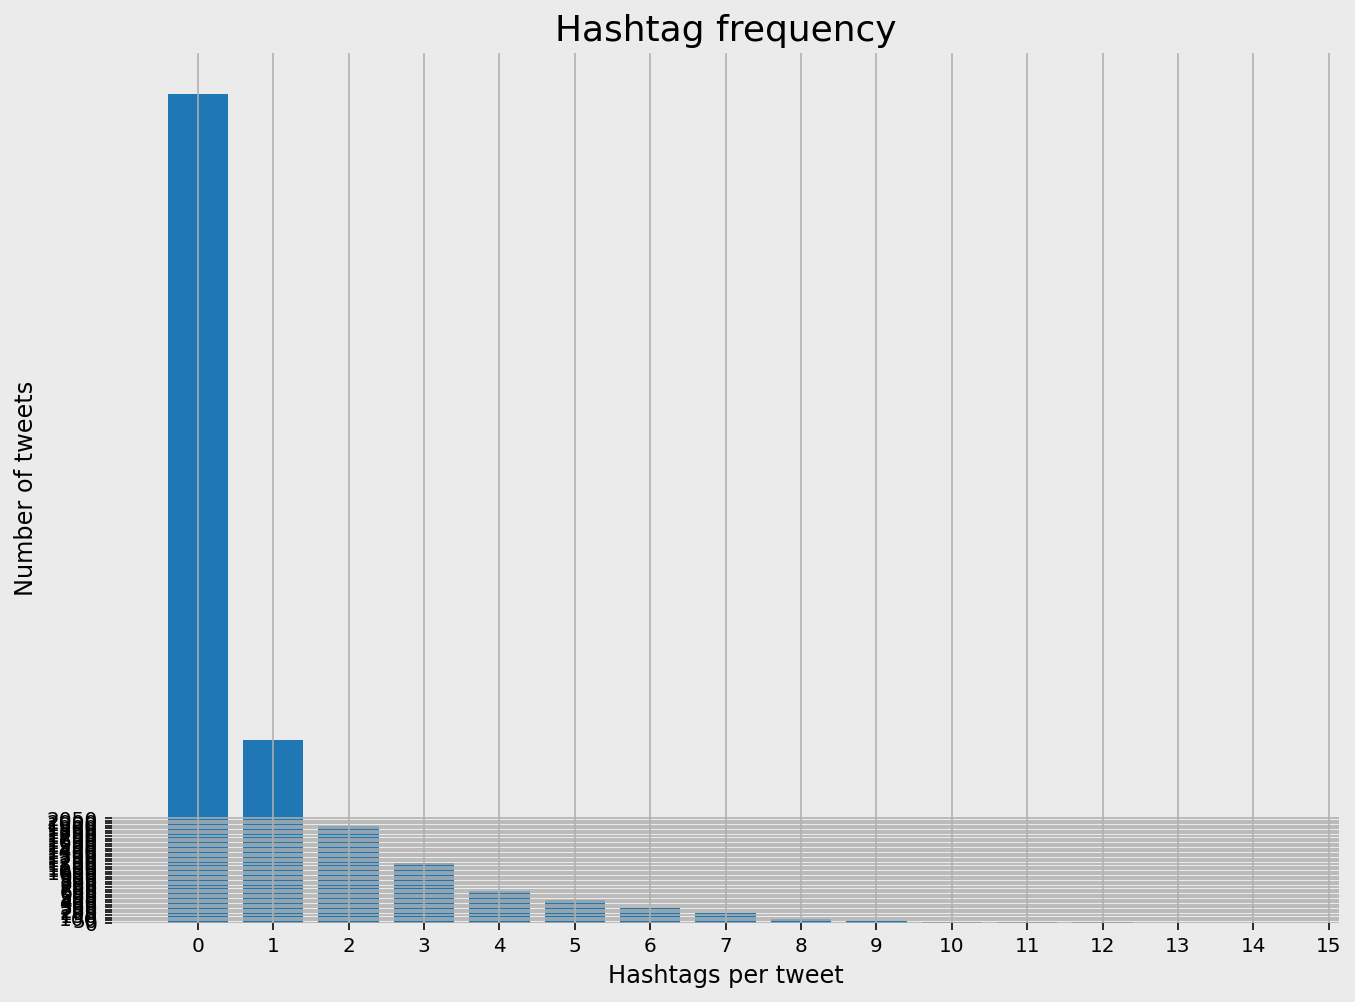

In [ ]:
plt.figure(facecolor='#ebebeb', figsize=(11, 8))
plt.bar([x[0] for x in hashtag_summary['hashtag_freq'][:15]],
        [x[1] for x in hashtag_summary['hashtag_freq'][:15]])
plt.title('Hashtag frequency', fontsize=18)
plt.xlabel('Hashtags per tweet', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.xticks(range(16))
plt.yticks(range(0, 2100, 50))
plt.grid(alpha=2)
plt.gca().set_frame_on(False)

In [ ]:
hashtag_summary['top_hashtags'][:10]

[('#marvininu', 412),
 ('#inflation', 255),
 ('#ukraine', 198),
 ('#marvin', 183),
 ('#srilanka', 153),
 ('#gold', 138),
 ('#crypto', 116),
 ('#india', 116),
 ('#lka', 115),
 ('#btc', 107)]

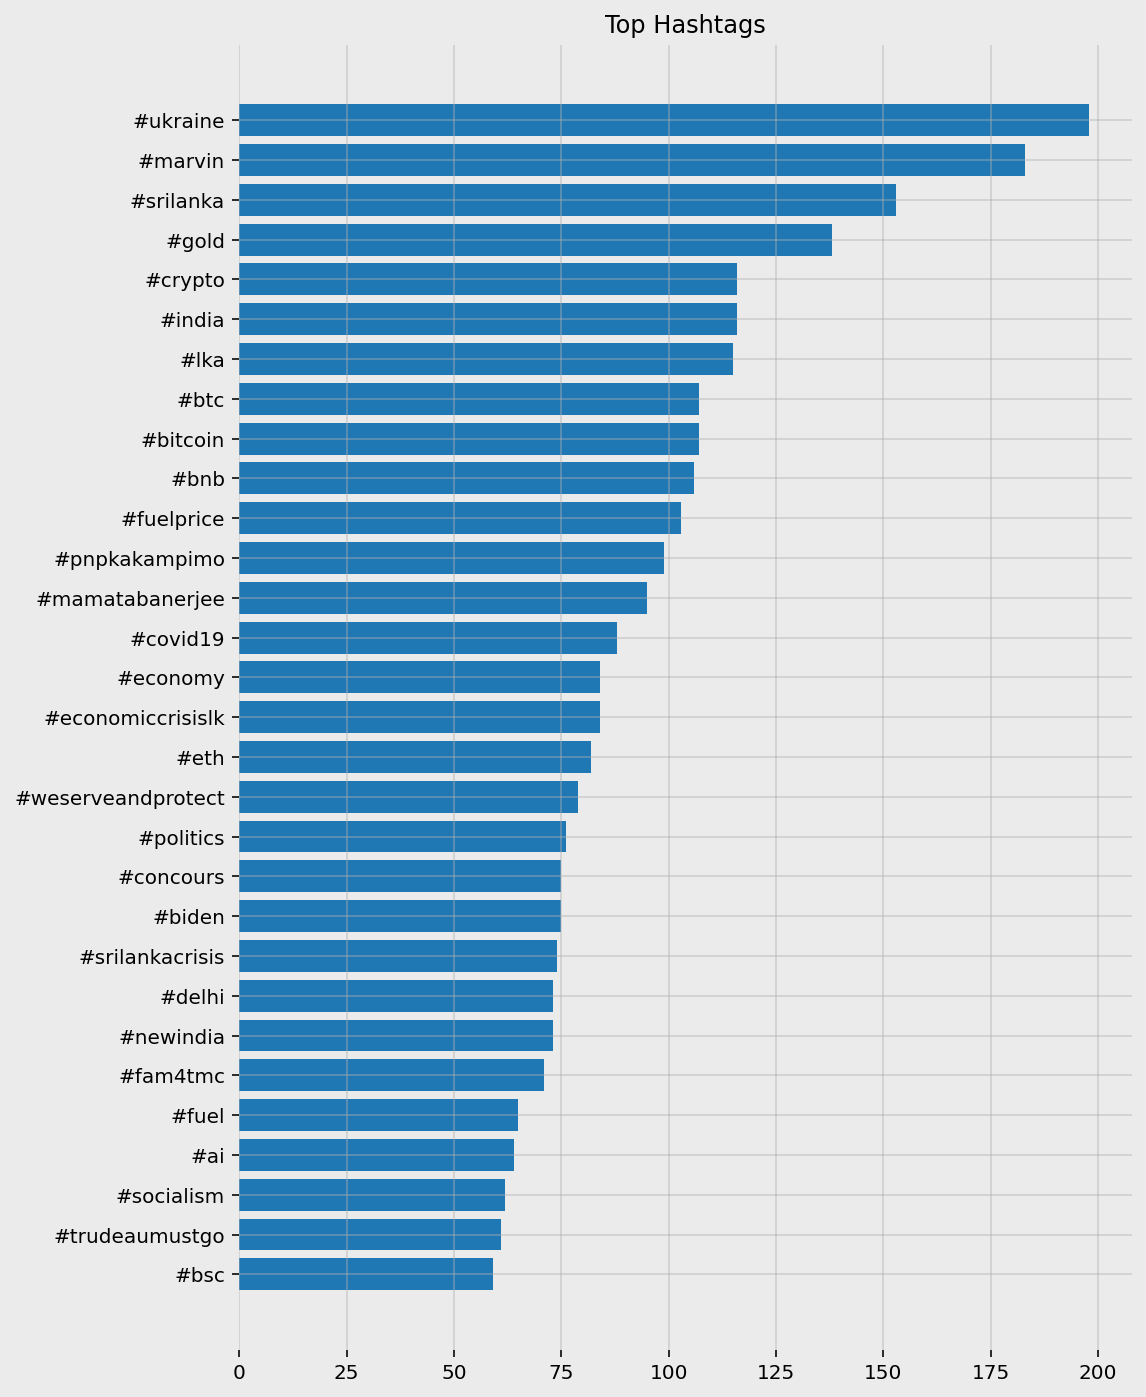

In [ ]:
plt.figure(facecolor='#ebebeb', figsize=(8, 12))
plt.barh([x[0] for x in hashtag_summary['top_hashtags'][2:][:30]][::-1],
         [x[1] for x in hashtag_summary['top_hashtags'][2:][:30]][::-1])
plt.title('Top Hashtags')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [ ]:
emoji_summary = adv.extract_emoji(tweets['text'])
emoji_summary.keys()

dict_keys(['emoji', 'emoji_text', 'emoji_flat', 'emoji_flat_text', 'emoji_counts', 'emoji_freq', 'top_emoji', 'top_emoji_text', 'top_emoji_groups', 'top_emoji_sub_groups', 'overview'])

In [ ]:
emoji_summary['overview']

{'emoji_per_post': 0.3725482233502538,
 'num_emoji': 9174,
 'num_posts': 24625,
 'unique_emoji': 718}

In [ ]:
emoji_summary['emoji'][:20]

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['⁉️', '❓', '⁉️', '👇'],
 ['😢', '🤢']]

In [ ]:
list(zip(emoji_summary['emoji_flat'][:10], emoji_summary['emoji_flat_text'][:10]))

[('⁉️', 'exclamation question mark'),
 ('❓', 'red question mark'),
 ('⁉️', 'exclamation question mark'),
 ('👇', 'backhand index pointing down'),
 ('😢', 'crying face'),
 ('🤢', 'nauseated face'),
 ('‼️', 'double exclamation mark'),
 ('😠', 'angry face'),
 ('🙈', 'see-no-evil monkey'),
 ('🙊', 'speak-no-evil monkey')]

In [ ]:
emoji_summary['emoji_counts'][:15]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

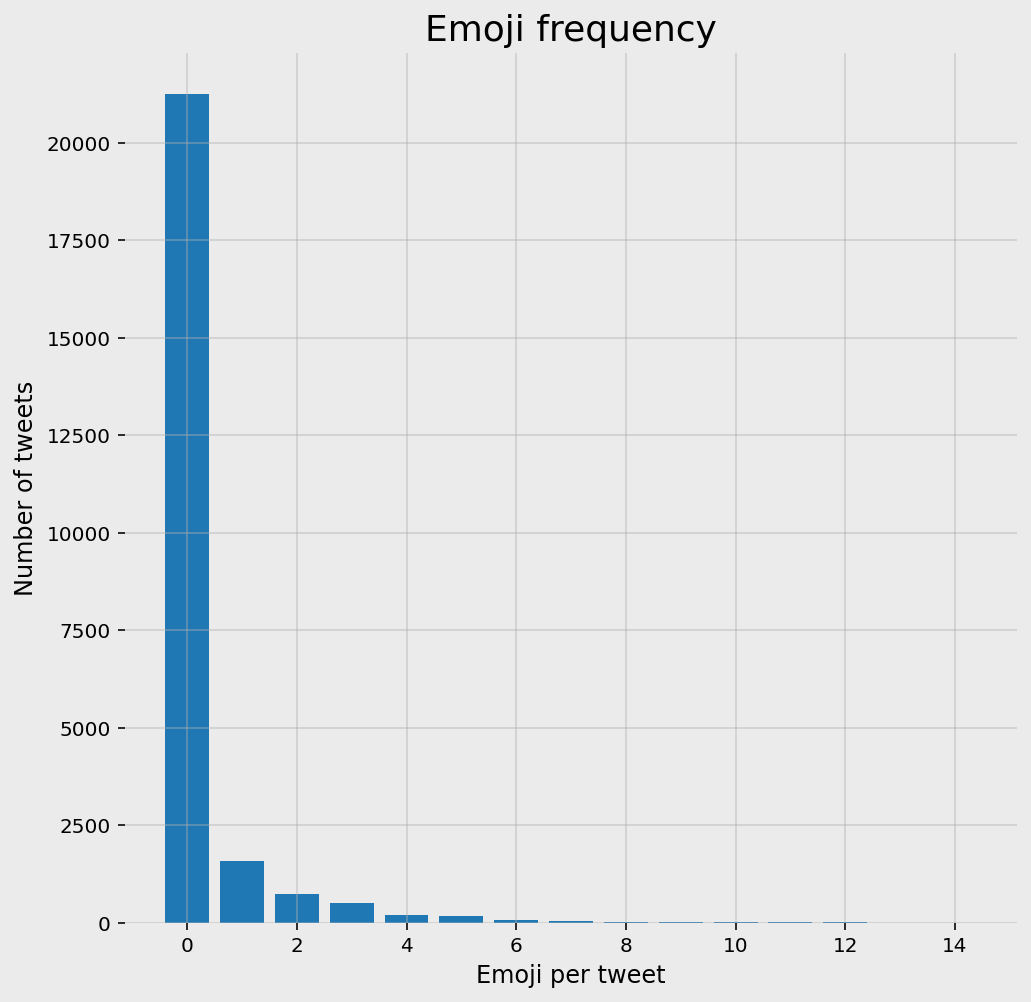

In [ ]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.bar([x[0] for x in emoji_summary['emoji_freq'][:15]],
        [x[1] for x in emoji_summary['emoji_freq'][:15]])
plt.title('Emoji frequency', fontsize=18)
plt.xlabel('Emoji per tweet', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [ ]:
emoji_summary['top_emoji'][:20]

[('\U0001f7e9', 641),
 ('⬜', 521),
 ('🤣', 496),
 ('🔥', 491),
 ('😂', 369),
 ('🚀', 252),
 ('\U0001f7e8', 230),
 ('👉', 216),
 ('🙏', 164),
 ('⬛', 157),
 ('❤️', 130),
 ('💥', 94),
 ('🐶', 90),
 ('👇', 88),
 ('🤔', 86),
 ('\U0001f7e2', 82),
 ('💰', 81),
 ('❗', 77),
 ('🎁', 74),
 ('👍', 69)]

In [ ]:
emoji_summary['top_emoji_text'][:20]

[('green square', 641),
 ('white large square', 521),
 ('rolling on the floor laughing', 496),
 ('fire', 491),
 ('face with tears of joy', 369),
 ('rocket', 252),
 ('yellow square', 230),
 ('backhand index pointing right', 216),
 ('red heart', 187),
 ('folded hands', 164),
 ('black large square', 157),
 ('collision', 94),
 ('dog face', 90),
 ('backhand index pointing down', 88),
 ('thinking face', 86),
 ('green circle', 82),
 ('money bag', 81),
 ('red exclamation mark', 77),
 ('wrapped gift', 74),
 ('thumbs up', 69)]

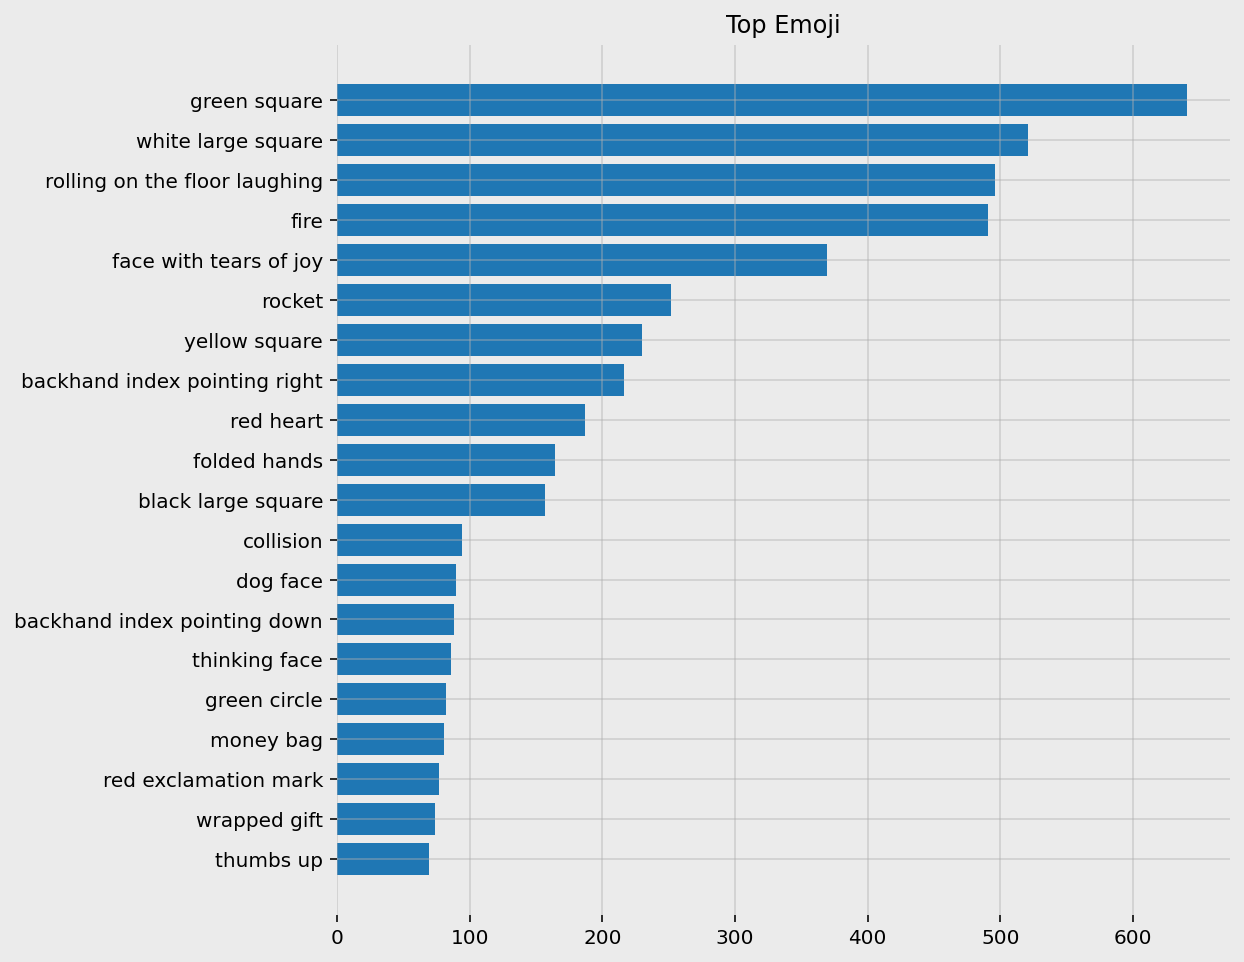

In [ ]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.barh([x[0] for x in emoji_summary['top_emoji_text'][:20]][::-1],
         [x[1] for x in emoji_summary['top_emoji_text'][:20]][::-1])
plt.title('Top Emoji')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [ ]:
mention_summary = adv.extract_mentions(tweets['text'])
mention_summary.keys()

dict_keys(['mentions', 'mentions_flat', 'mention_counts', 'mention_freq', 'top_mentions', 'overview'])

In [ ]:
mention_summary['overview']

{'mentions_per_post': 1.1053807106598985,
 'num_mentions': 27220,
 'num_posts': 24625,
 'unique_mentions': 11485}

In [ ]:
mention_summary['mentions'][:15]

[['@nikitheblogger'],
 ['@sagt_mit'],
 ['@kryptonoun', '@wri007'],
 ['@wri007'],
 ['@rolandtichy'],
 ['@biggyyyyyyy'],
 ['@siriablack_ii'],
 ['@darling_2022'],
 ['@rosenbusch_'],
 ['@kickout55711802'],
 ['@safka111'],
 ['@sagt_mit'],
 ['@ben_brechtken'],
 ['@nikitheblogger'],
 ['@siebziger69']]

In [ ]:
mention_summary['mentions_flat'][:10]

['@nikitheblogger',
 '@sagt_mit',
 '@kryptonoun',
 '@wri007',
 '@wri007',
 '@rolandtichy',
 '@biggyyyyyyy',
 '@siriablack_ii',
 '@darling_2022',
 '@rosenbusch_']

In [ ]:
mention_summary['mention_counts'][:20]

[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
mention_summary['mention_freq'][:15]

[(0, 6531),
 (1, 12754),
 (2, 3468),
 (3, 1137),
 (4, 320),
 (5, 152),
 (6, 74),
 (7, 49),
 (8, 67),
 (9, 26),
 (10, 18),
 (11, 14),
 (12, 10),
 (13, 3),
 (14, 1)]

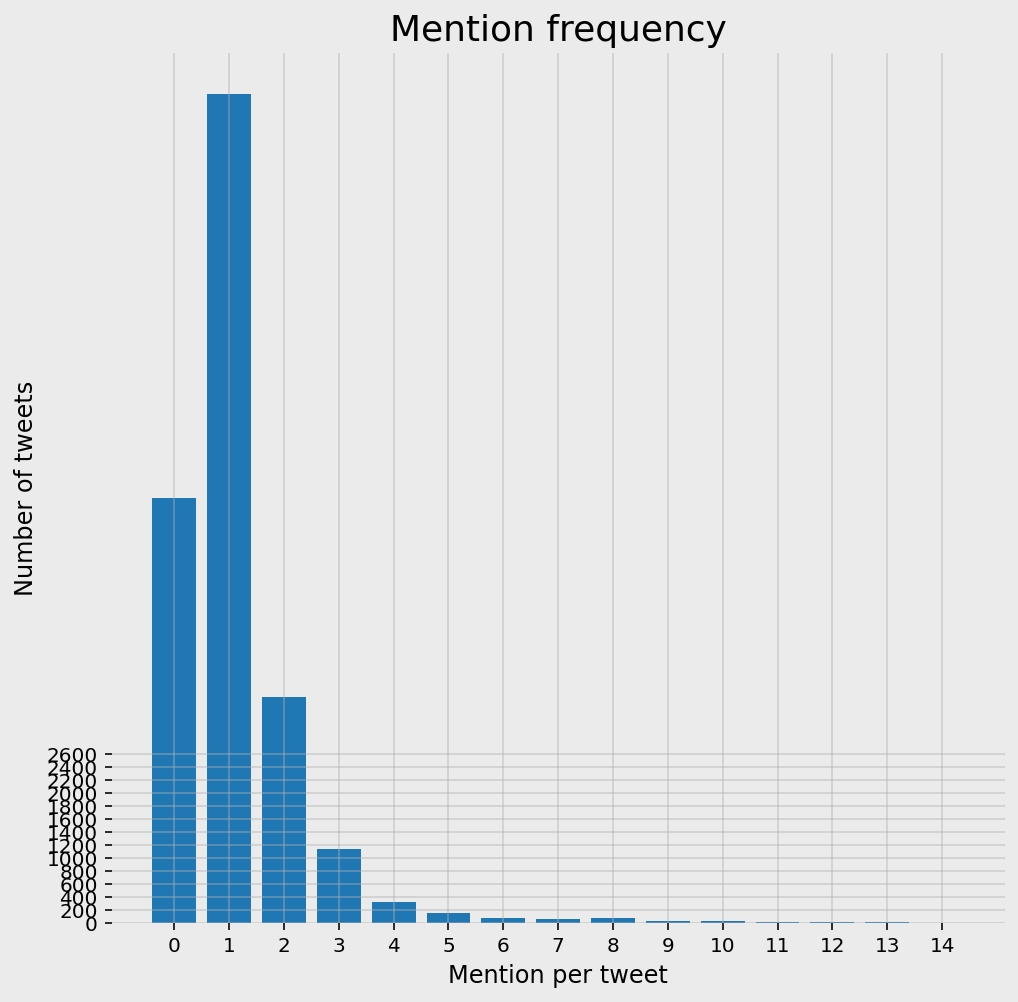

In [ ]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.bar([x[0] for x in mention_summary['mention_freq'][:15]],
        [x[1] for x in mention_summary['mention_freq'][:15]])
plt.title('Mention frequency', fontsize=18)
plt.xlabel('Mention per tweet', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.xticks(range(15))
plt.yticks(range(0, 2800, 200))
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [ ]:
mention_summary['top_mentions'][:10]

[('@mamataofficial', 453),
 ('@aitcofficial', 391),
 ('@marvin_inu', 258),
 ('@etprime_com', 216),
 ('@narendramodi', 215),
 ('@abhishekaitc', 200),
 ('@elonmusk', 159),
 ('@bjp4india', 145),
 ('@janasenaparty', 133),
 ('@nadeeminc', 116)]

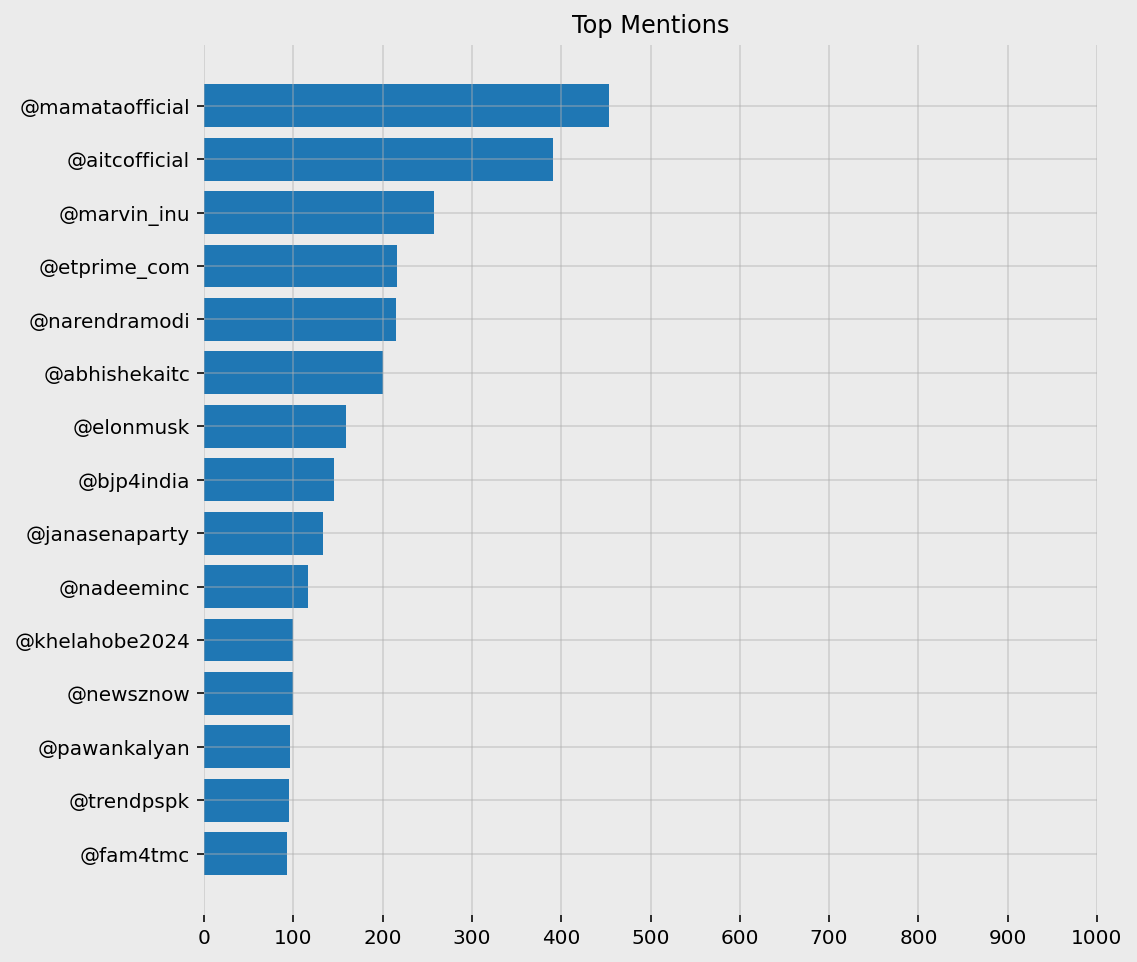

In [ ]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.barh([x[0] for x in mention_summary['top_mentions'][:15]][::-1],
         [x[1] for x in mention_summary['top_mentions'][:15]][::-1])
plt.title('Top Mentions')
plt.grid(alpha=0.5)
plt.xticks(range(0, 1100, 100))
plt.gca().set_frame_on(False)

In [ ]:
question_summary = adv.extract_questions(tweets['text'])

In [ ]:
question_summary.keys()

dict_keys(['question_marks', 'question_marks_flat', 'question_mark_counts', 'question_mark_freq', 'top_question_marks', 'overview', 'question_mark_names', 'question_text'])

In [ ]:
question_summary['overview']

{'num_posts': 24625,
 'num_question_marks': 2351,
 'question_marks_per_post': 0.09547208121827411,
 'unique_question_marks': 5}

In [ ]:
question_summary['question_mark_freq']

[(0, 22716),
 (1, 1641),
 (2, 180),
 (3, 64),
 (4, 10),
 (5, 6),
 (6, 3),
 (9, 1),
 (12, 1),
 (15, 2),
 (19, 1)]

In [ ]:
question_summary['top_question_marks'] # this is more interesting if you have questions in different languages where different question marks are used.

[('?', 2308), ('¿', 16), ('؟', 13), ('？', 9), ('⁉', 5)]

In [ ]:
[(i,x) for i, x in  enumerate(question_summary['question_text']) if x][:15]

[(15, ['Geht es dem Journalistenpack nur noch um das Geld?']),
 (18, ['RT @Ira74448224: ⁉']),
 (29, ['damit wir wissen, was uns blüht?']),
 (33,
  ['RT @Kryptonoun: @argonerd Wieso grenzen Juden sich mit dem Wort Antisemitismus selber aus?',
   'Ist das nicht Rassismus?']),
 (34,
  ['RT @AntjeHermenau: Gibt es eigentlich Bundestagsabgeordnete, die Aktien von BionTech, Pfizer oder Moderna halten?']),
 (39,
  ['RT @MichaelAArouet: German 10y mortgage rate went from 0,8% to 2,50% 👇 Can you hear the sound of German real estate bubble bursting?']),
 (41, ['RT @goldseek: When?']),
 (43,
  ['RT @biancoresearch: Rates rise until something breaks … is anything broken yet?']),
 (51, ['RT @AndreasSteno: JAPANIFICATION OF YIELDS GONE?']),
 (90, ['COINCIDENCE?']),
 (101,
  ['MAYOR OF CRAZY TOWN: Why is the Easter Bunny directing Biden to do anything?']),
 (117, ['Biden’s Price Hike: You think it’s bad now?']),
 (143, ["RT @bwin_France: 🏆 Envie d'aller supporter l'OM en #UECL ?"]),
 (171,
  ['RT @bu

In [ ]:
intense_summary = adv.extract_intense_words(tweets['text'], min_reps=3)

In [ ]:
intense_summary['overview']

{'intense_words_per_post': 0.10749238578680204,
 'num_intense_words': 2647,
 'num_posts': 24625,
 'unique_intense_words': 1697}

In [ ]:
intense_summary['top_intense_words'][:20]

[('...', 94),
 ('\U0001f7e9\U0001f7e9\U0001f7e9\U0001f7e9\U0001f7e9', 66),
 ('👉👉👉', 57),
 ('1000', 33),
 ('#1000xgem', 32),
 ('!!!', 20),
 ('🤣🤣🤣', 18),
 ('leaders...in', 17),
 ('$QQQ', 15),
 ('000', 15),
 ('😂😂😂', 15),
 ('🚀🚀🚀', 12),
 ('⬜⬜⬜⬜⬜', 12),
 ('???', 11),
 ('200,000', 9),
 ('....', 9),
 ('🔥🔥🔥', 9),
 ('⬜\U0001f7e8⬜⬜⬜', 9),
 ('2000', 8),
 ('🤣🤣🤣🤣🤣', 8)]

In [ ]:
currency_summary = adv.extract_currency(tweets['text'])

In [ ]:
currency_summary.keys()


dict_keys(['currency_symbols', 'currency_symbols_flat', 'currency_symbol_counts', 'currency_symbol_freq', 'top_currency_symbols', 'overview', 'currency_symbol_names', 'surrounding_text'])

In [ ]:
currency_summary['top_currency_symbols']

[('$', 1427), ('€', 145), ('₹', 48), ('£', 43), ('₿', 3), ('฿', 1), ('￥', 1)]

In [ ]:
[x for x in currency_summary['surrounding_text'] if x][:20]

[[' im Wagen sind 75,00€. Mir ist schlecht. '],
 ['ces will hover near $100/bbl, which means'],
 ['YOUR DIME: ICE blew $17M on unused hotel '],
 ['c university to pay $400,000 in damages a'],
 [' doughnut prices to $4.11 average gas pri'],
 [' carte cadeau de 100€ sur Nike 🛍'],
 ['dinFinancial | FORK $TITANO'],
 ['l, on vous offre 250$ !'],
 ['2x 150$ en #SOL'],
 ['🔥 86.50€ AU LIEU DE 173€ 🔥'],
 ['🎁 100 $ '],
 ['ous fait gagner 5x10€ de fre…'],
 [' stole an estimated $300 billion of U.S. '],
 ['united states $4.77 billion', 'estonia $0.24b', 'uk $0.…'],
 ['rendapotterr: 🙏Just $100 left on Mutual A', '🙏$100 Groceries for Fa'],
 ['🙏$150 Groceries for…'],
 ['🙏$200 Groc…'],
 ['🙏$340 Groc…'],
 ['🙏$440 Groceries for Fa'],
 ['🙏$440 Groceries for Fa']]

In [ ]:
# checking the distribution of tweets in the data

length_train = tweets['entities	'].str.len().plot.hist(color = 'pink', figsize = (6, 4))

KeyError: ignored

In [ ]:
# adding a column to represent the length of the tweet

tweets['len'] = tweet['retweet'].str.len()


train.head(10)

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


In [ ]:

tweets.groupby('id').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

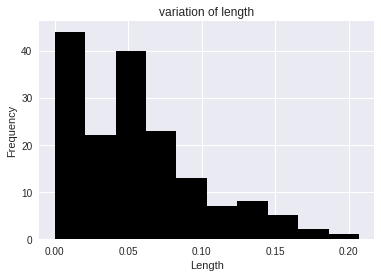

In [ ]:
tweets.groupby('len').mean()['id'].plot.hist(color = 'black', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2346 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2346 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2352 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0,

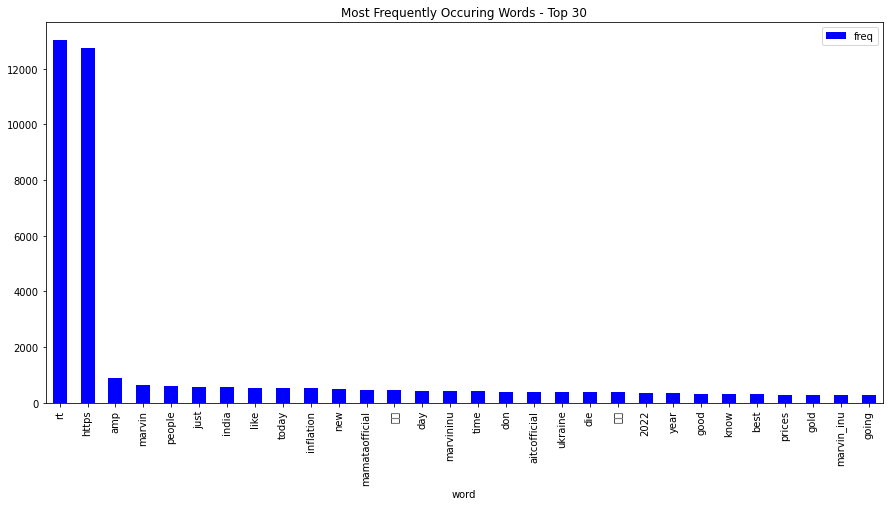

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(tweets.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


Text(0.5, 1.0, 'WordCloud ')

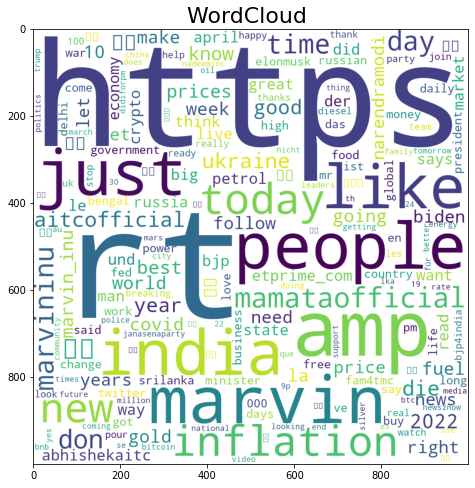

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud ", fontsize = 22)

In [ ]:
normal_words =' '.join([text for text in tweets['text'][tweets['id_str'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()


ValueError: ignored

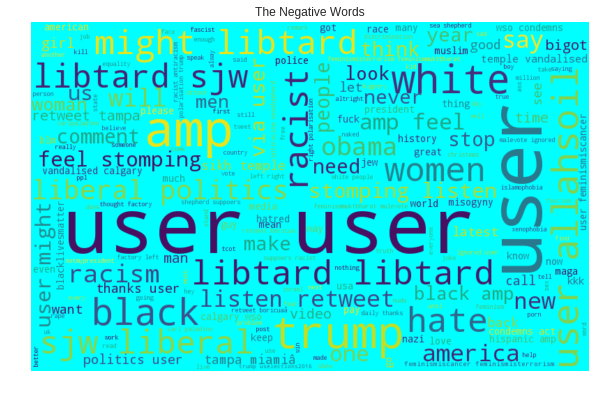

In [ ]:
negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()


In [ ]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


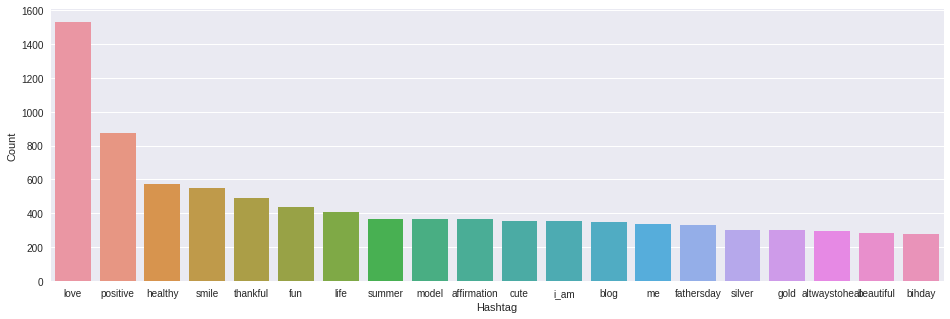

In [ ]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


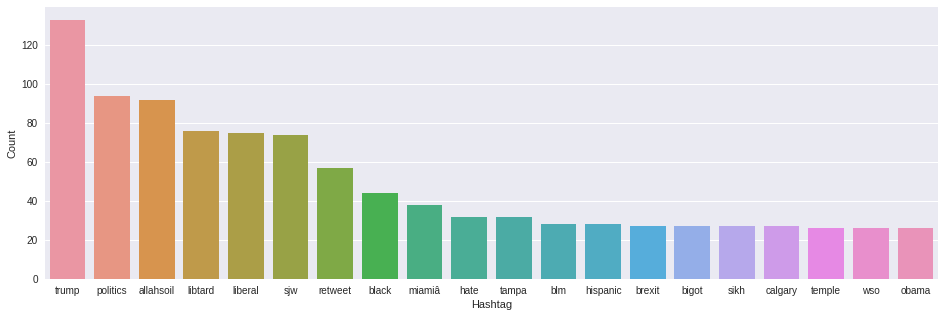

In [ ]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
# tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

(6109793, 8411580)

In [ ]:
model_w2v.wv.most_similar(positive = "dinner")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('spaghetti', 0.6905485391616821),
 ('#prosecco', 0.6454159021377563),
 ('#wanderlust', 0.6233653426170349),
 ('coaching', 0.5992934703826904),
 ('podium', 0.5991446375846863),
 ('#restaurant', 0.5981520414352417),
 ('#boardgames', 0.597622275352478),
 ('sister!!', 0.5959595441818237),
 ('fluffy', 0.5959100127220154),
 ('#marbs', 0.5941186547279358)]

In [ ]:
model_w2v.wv.most_similar(positive = "cancer")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('champion,', 0.7316977977752686),
 ('law.', 0.7225637435913086),
 ('targeted', 0.7105468511581421),
 ('level.', 0.708966851234436),
 ('ways.', 0.7079764604568481),
 ('spots.', 0.7034740447998047),
 ('ownership', 0.6990857720375061),
 ("society's", 0.696666419506073),
 ('lost!', 0.6964439153671265),
 ('aol', 0.6912544965744019)]

In [ ]:
model_w2v.wv.most_similar(positive = "apple")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('mytraining', 0.7157385945320129),
 ('"mytraining"', 0.7155206203460693),
 ('training"', 0.6973456740379333),
 ('app,', 0.6573682427406311),
 ('ta', 0.6150115132331848),
 ('"my', 0.6147005558013916),
 ('app', 0.6037276387214661),
 ('bees', 0.5805186033248901),
 ('humans.', 0.5746567845344543),
 ('heroku', 0.5709062814712524)]

In [ ]:
model_w2v.wv.most_similar(negative = "hate")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('#apple', -0.014370085671544075),
 ('#games', -0.022436674684286118),
 ('stas', -0.03985826298594475),
 ('#hype', -0.04824943095445633),
 ('#yay', -0.05032265931367874),
 ('eyes', -0.05534423142671585),
 ('#fundraising', -0.062193769961595535),
 ('hands', -0.06642157584428787),
 ('now.', -0.06834007054567337),
 ('season', -0.06963707506656647)]

In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [ ]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  after removing the cwd from sys.path.


[LabeledSentence(words=['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 LabeledSentence(words=['factsguide:', 'society', 'now', '#motivation'], tags=['tweet_4']),
 LabeledSentence(words=['[2/2]', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave.', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there.', '#allshowandn

In [ ]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [ ]:
test_corpus = []

for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [ ]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)


(31962, 2500)
(31962,)


In [ ]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)


(17197, 2500)


In [ ]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


In [ ]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training Accuracy : 0.9946602144257645
Validation Accuracy : 0.9501939682142411
F1 score : 0.6004016064257027
[[7294  138]
 [ 260  299]]


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training Accuracy : 0.984773267698469
Validation Accuracy : 0.9410586910274058
f1 score : 0.5915004336513443
[[7179  253]
 [ 218  341]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9326742585408585
f1 score : 0.5393835616438356
[[7138  294]
 [ 244  315]]


In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)